#### Exploratory Data Analysis 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [82]:
plt.rc("font", size=8)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

Combine the two files

In [83]:
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

In [84]:

cpd_data = pd.read_csv("cpd.csv")

print(cpd_data.shape)
#print(cpd_data.columns)

cpd_data = cpd_data.dropna(subset=['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)'])

temp1['age'] = cpd_data['6. How old are you? ']
temp1['job'] = cpd_data['job type']
temp1['educ'] = cpd_data['educ']
temp1['sex'] = cpd_data['female']
temp1['genderid'] = cpd_data['genderid']
temp1['loc'] = cpd_data['loc']
temp1['device'] = cpd_data['devices']
temp1['purpose'] = cpd_data['purpose page']
temp1['rh_needs'] = cpd_data['perceived rh needs']
temp1['benefit'] = cpd_data['benefitnum']
temp1['platforms'] = cpd_data['platforms']
temp1['oftenvisit'] = cpd_data['oftenvisit']
temp1['learnpage'] = cpd_data['learnpage']
temp1['contents'] = cpd_data['contents']
temp1['visuals'] = cpd_data['visuals']
temp1['civil'] = cpd_data['civil']
temp1['social'] = cpd_data['social']

temp1['private_'] = cpd_data['What facility? ']
temp1['conversion3_'] = cpd_data['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)']

temp1['conversion3'] = temp1['conversion3_'].apply(lambda x: 1 if x == 'Modern (Makabago)' else 0 )

temp1['helpful_'] = cpd_data['Did you find the digital platform helpful to your family planning journey?']
temp1['helpful']= temp1['helpful_'].str[0]
temp1.drop(columns=['helpful_'], inplace=True)

temp1['private'] = temp1['private_'].apply(lambda x: 1 if x == 'Private clinic (Pribadong klinika)' else 0 )
temp1.drop(columns=['conversion3_'], inplace=True)
temp1.drop(columns=['private_'], inplace=True)

temp1['tag'] = 0
print(temp1.tail())

(650, 74)
     age  job  educ  sex  genderid  loc  device  purpose  rh_needs  benefit  \
643   24    2     1    1         4    1       1        1         4        5   
644   18    4     4    1         1    1       1        1         1        1   
645   25    1     1    1         1    1       1        1         1        5   
646   20    4     2    1         1    1       0        3         1        1   
649   26    2     1    1         1    1       1        1         1        1   

     ...  oftenvisit  learnpage  contents  visuals  civil  social  \
643  ...           4          1         1        5    NaN     NaN   
644  ...           3          1         1        5    NaN     NaN   
645  ...           5          1         1        5    NaN     NaN   
646  ...           1          1         1        4    NaN     NaN   
649  ...           5          1         3        3    NaN     NaN   

     conversion3  helpful private  tag  
643            1      NaN       0    0  
644            1  

In [85]:

Bayer_data = pd.read_csv("Bayer.csv")

print(Bayer_data.shape)
#print(Bayer_data.columns)
Bayer_data = Bayer_data.dropna(subset=['Yes, I will consider the use of contraception'])

temp2['age'] = Bayer_data['How old are you?']
temp2['job'] = Bayer_data['Job Title']
temp2['educ'] = Bayer_data['Educ']
temp2['sex'] = Bayer_data['Female']
temp2['genderid'] = Bayer_data['GenderID']
temp2['loc'] = Bayer_data['Loc']
temp2['device'] = Bayer_data['Devices']
temp2['purpose'] = Bayer_data['Purpose Page']
temp2['rh_needs'] = Bayer_data['perceived rh needs']
temp2['benefit'] = Bayer_data['Benefit Number']
temp2['platforms'] = Bayer_data['platforms']
temp2['oftenvisit'] = Bayer_data['Often Visit']
temp2['learnpage'] = Bayer_data['Learnpage']
temp2['contents'] = Bayer_data['Contents']
temp2['visuals'] = Bayer_data['Visuals']
temp2['civil'] = Bayer_data['Civil']
temp2['social'] = Bayer_data['Social']
temp2['private_'] = Bayer_data['What facility?']
temp2['conversion3_'] = Bayer_data['Yes, I will consider the use of contraception']

temp2['conversion3'] = temp2['conversion3_'].apply(lambda x: 1 if x == 'Modern' else 0 )


temp2['helpful'] = Bayer_data['Did you find the digital platform helpful to your family planning journey?']


temp2.drop(columns=['conversion3_'], inplace=True)
temp2['private'] = temp2['private_'].apply(lambda x: 1 if x == 'Private clinic' else 0 )
temp2.drop(columns=['private_'], inplace=True)


temp2['tag'] = 1
print(temp2.tail())

(495, 101)
     age  job  educ  sex  genderid  loc  device  purpose  rh_needs  benefit  \
490   24    3     3    1         1    4       1        2         1        5   
491   19    5     5    1         1    2       1        2         1        5   
492   35    3     3    0         2    4       1        2         3        5   
493   30    5     4    0         2    1       0        4         1        1   
494   34    3     1    1         1    1       1        2         1        1   

     ...  oftenvisit  learnpage  contents  visuals  civil  social  \
490  ...           2          1         4        4    2.0       1   
491  ...           2          1         4        5    1.0       1   
492  ...           2          1         6        6    1.0       1   
493  ...           1          1         1        1    1.0       1   
494  ...           2          4         6        1    3.0       1   

     conversion3  helpful  private  tag  
490            1      5.0        0    1  
491            

Merge both dataframe

In [86]:
cdata1 = pd.concat([temp1, temp2], ignore_index=True)
cdata1 = cdata1.dropna()

print(cdata1.head())
print(cdata1.shape)

   age  job  educ  sex  genderid  loc  device  purpose  rh_needs  benefit  \
0   34    3     2    1         1    1       1        1         1        1   
1   25    2     2    1         3    1       1        1         4        5   
2   32    2     3    1         1    1       1        2         4        1   
3   31    2     1    1         1    1       1        3         1        1   
4   24    2     1    1         1    1       1        1         4        1   

   ...  oftenvisit  learnpage  contents  visuals  civil  social  conversion3  \
0  ...           5          1         1        4    1.0     0.0            1   
1  ...           5          2         2        2    2.0     1.0            1   
2  ...           2          1         3        6    1.0     1.0            1   
3  ...           1          2         3        6    1.0     1.0            1   
4  ...           5          1         1        2    1.0     1.0            1   

   helpful private  tag  
0        4       0    0  
1   

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = pd.DataFrame()

### Modern Methods

#### Demographics

Total respondents at the third conversion: **827**

Removing all respondents except those who availed private services

In [88]:
print(cdata1.shape)
condition = cdata1['private'] == 1
cdata1 = cdata1[~~condition]
print(cdata1.head())
print(cdata1.shape)
cdata1.drop(columns=['private'], inplace=True)

(783, 21)
    age  job  educ  sex  genderid  loc  device  purpose  rh_needs  benefit  \
8    26    1     1    0         3    2       1        3         2        1   
14   36    3     3    1         1    1       1        2         2        1   
37   34    2     1    1         4    1       1        1         1        1   
40   19    2     5    1         1    1       1        1         4        1   
57   27    2     1    1         1    2       1        1         5        1   

    ...  oftenvisit  learnpage  contents  visuals  civil  social  conversion3  \
8   ...           2          2         2        3    2.0     1.0            0   
14  ...           2          1         1        6    1.0     1.0            1   
37  ...           5          1         1        6    1.0     1.0            0   
40  ...           5          1         1        2    2.0     1.0            0   
57  ...           5          1         1        6    1.0     1.0            1   

    helpful private  tag  
8      

from 827 respondents, only **210** availed private hcp

##### Add only the demographics parameters

Visualize correlogram

<Figure size 1000x1000 with 0 Axes>

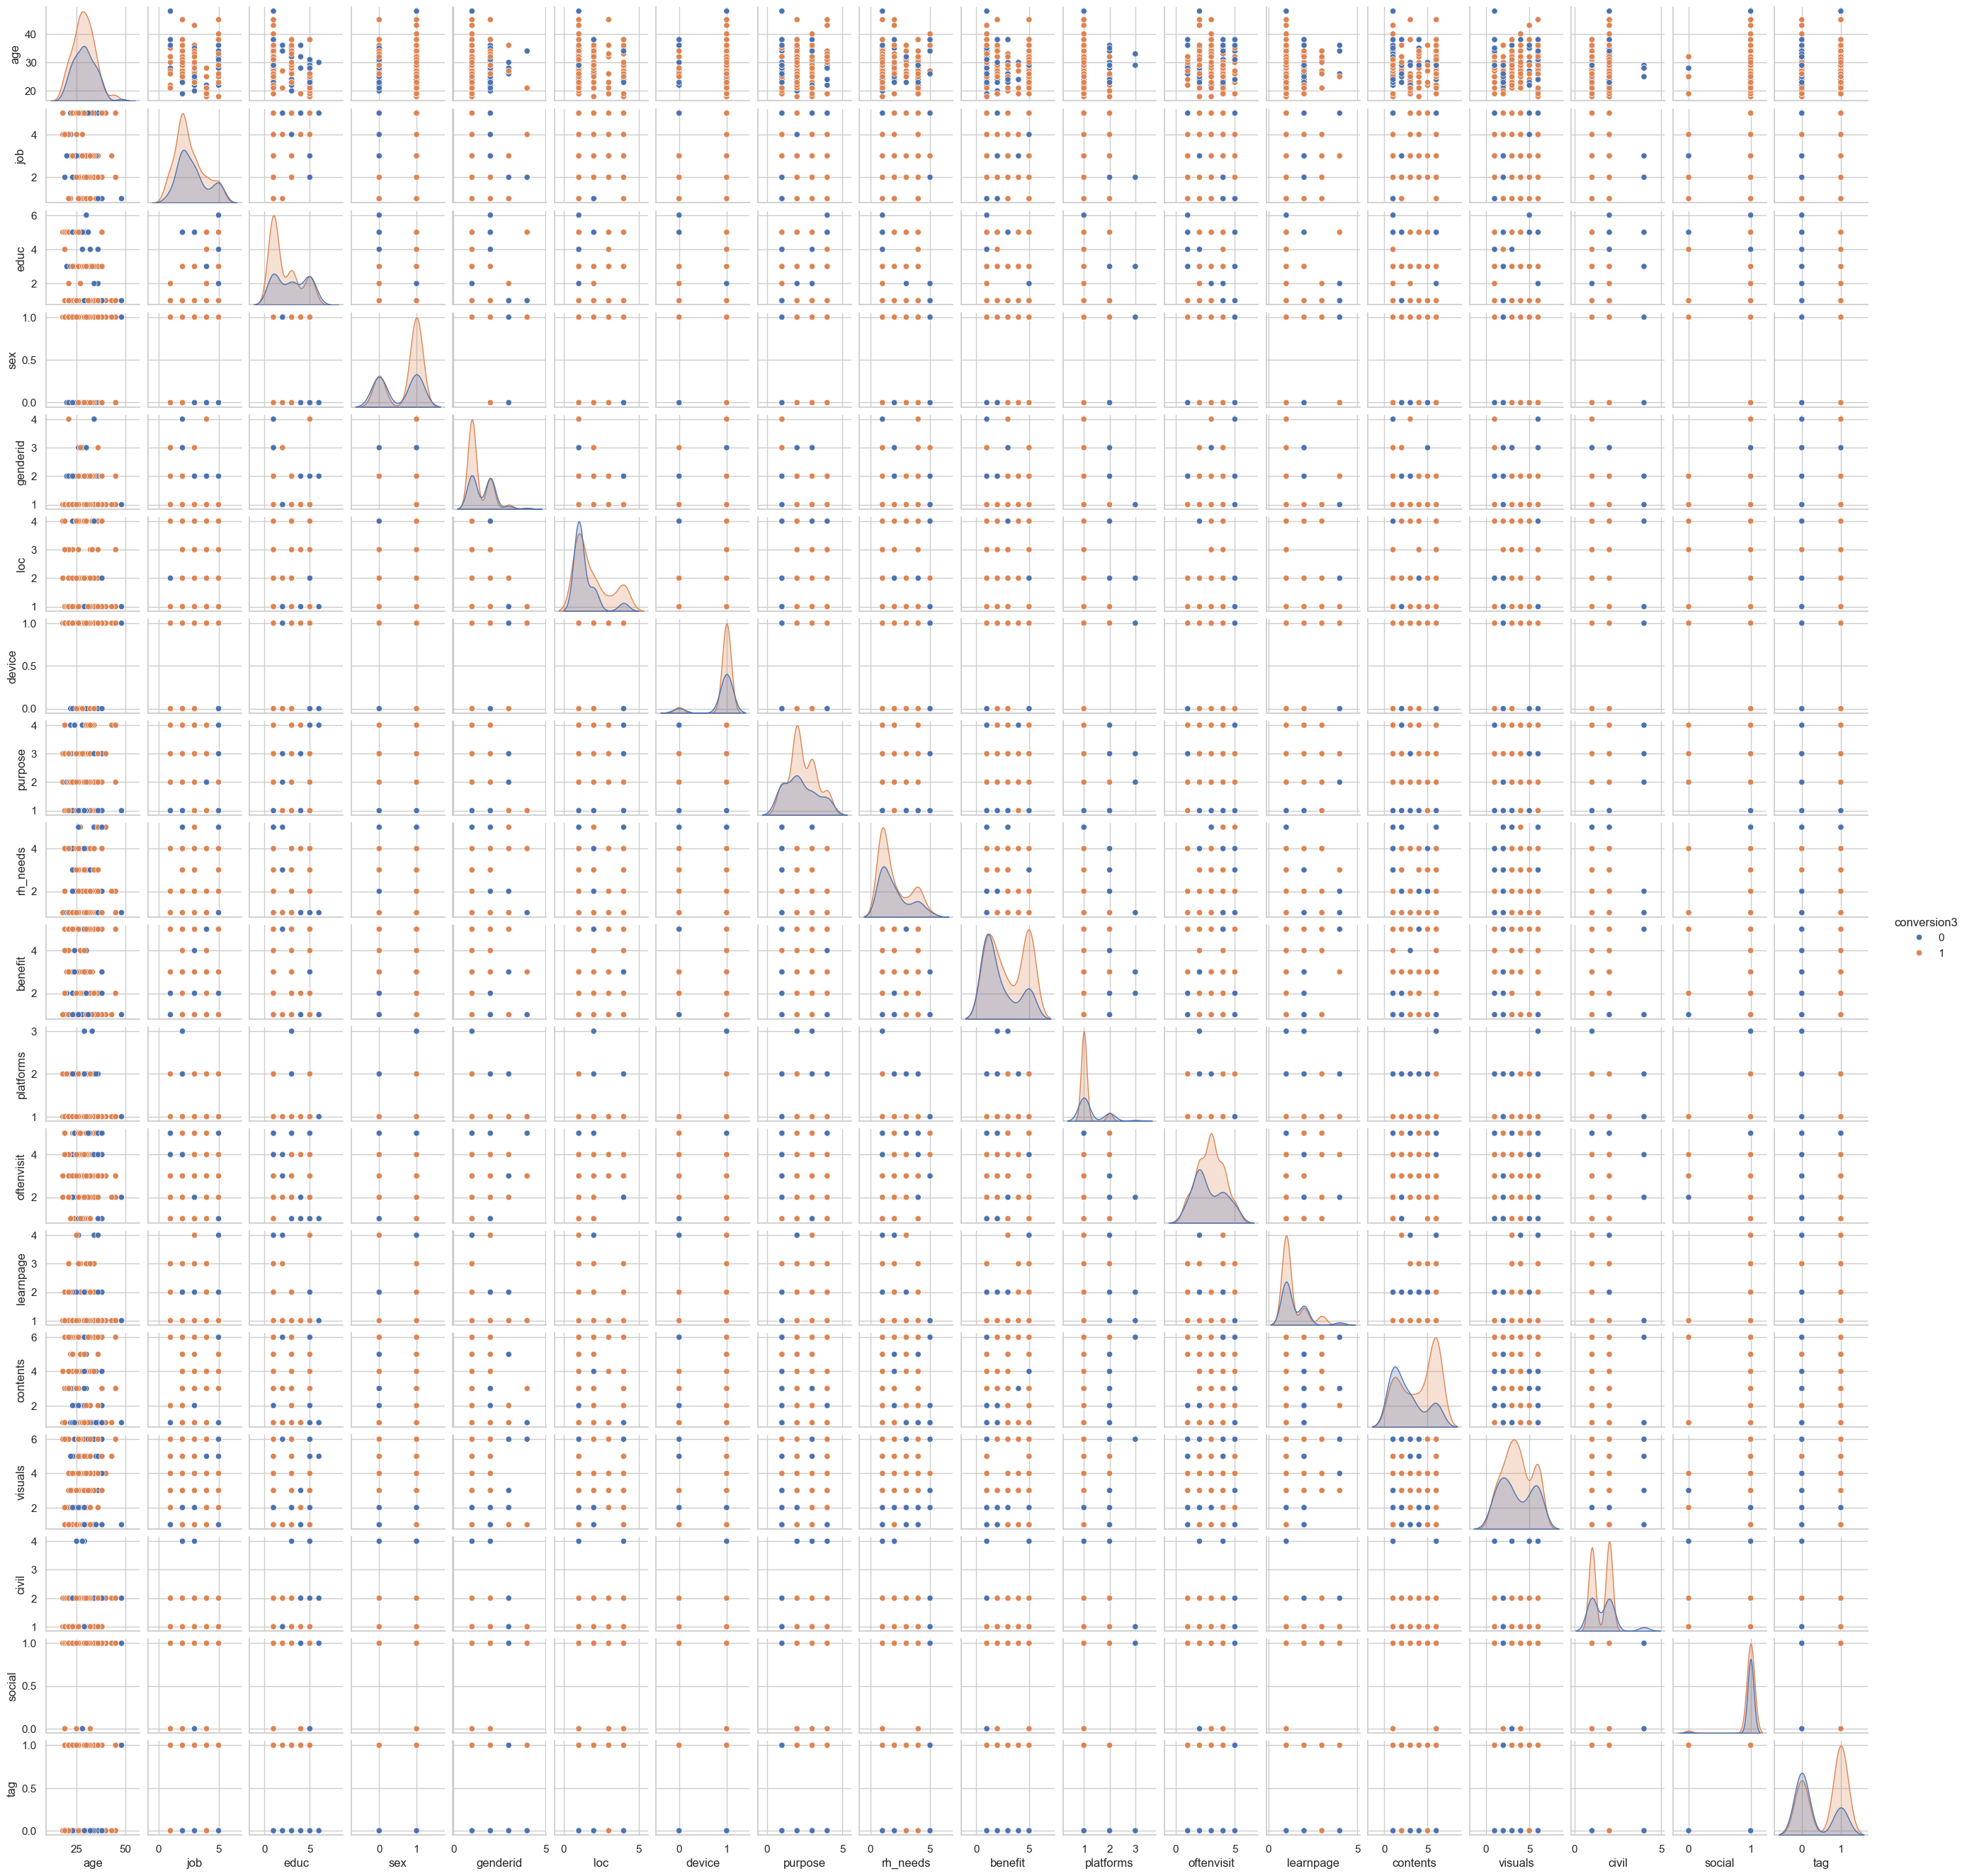

In [89]:
plt.figure(figsize=(10,10))
sns.pairplot(cdata1, hue='conversion3', height=1.5)
plt.show()

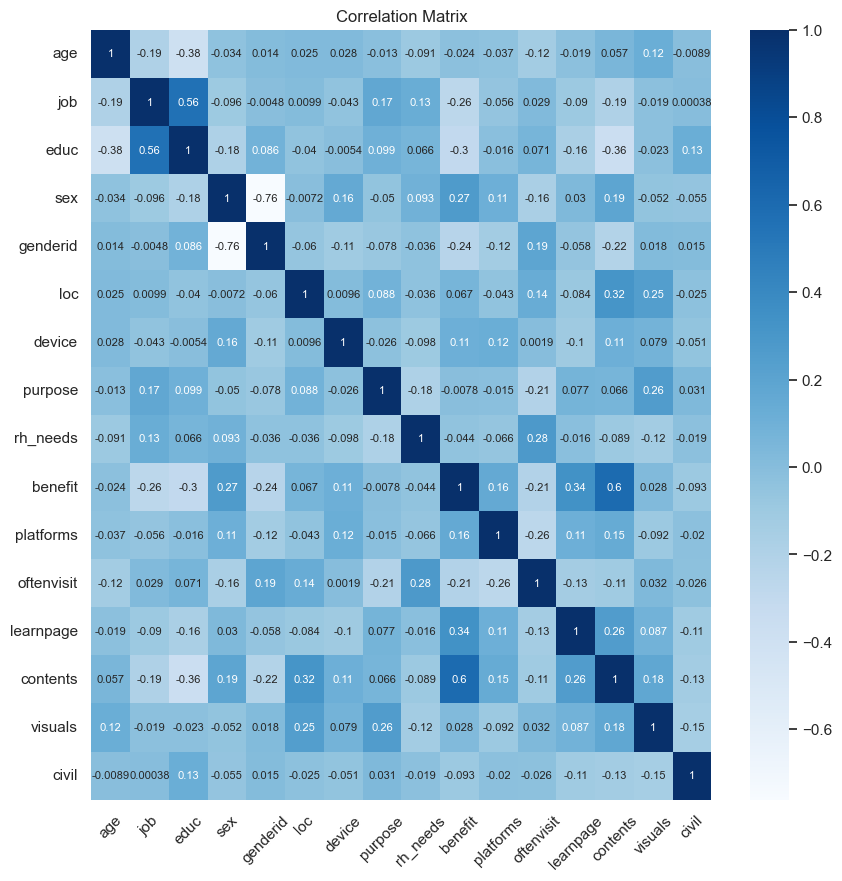

In [90]:
corr_matrix = cdata1.iloc[:,:16].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', annot_kws={"size":8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

here the genderid and female are closely related to each other. For firther analysis, one of these two parameter may be removed <br/>
also, educ and job are related <br/> 
contents and benefits are related

##### Investigate missing values and uniqueness

Text(0.5, 1.0, 'Missing values heatmap')

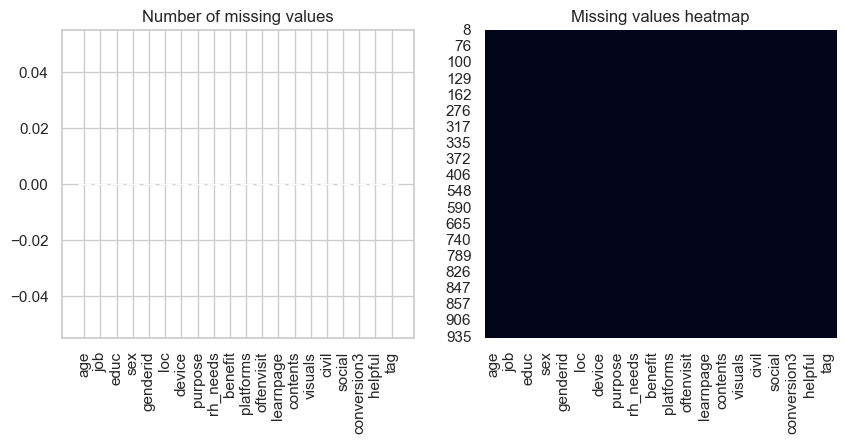

In [91]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(cdata1.columns.values, cdata1.isnull().sum())
plt.xticks(rotation=90)
plt.title("Number of missing values")
plt.subplot(122)
sns.heatmap(cdata1.isnull(), cbar = False).set_title("Missing values heatmap")

In [92]:
N_val = cdata1.nunique()
print(N_val)

age            24
job             5
educ            6
sex             2
genderid        4
loc             4
device          2
purpose         4
rh_needs        5
benefit         5
platforms       3
oftenvisit      5
learnpage       4
contents        6
visuals         6
civil           3
social          2
conversion3     2
helpful         7
tag             2
dtype: int64


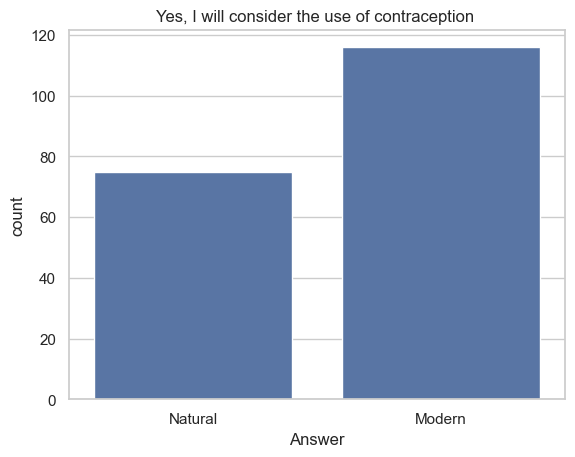

Natural - 75
Modern - 116


In [93]:
labels = ['Natural','Modern']
bins =[0,1,99]
temp['conversion3'] = pd.cut(cdata1['conversion3'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion3', data=temp)
plt.title(label='Yes, I will consider the use of contraception ')
plt.xlabel("Answer")
plt.show()

print("Natural - " + str (((temp['conversion3'] == 'Natural')).sum() ))
print("Modern - " + str (((temp['conversion3'] == 'Modern')).sum() ))
#cdata1['conversion3'] = temp['conversion3']


##### Age

In [94]:
(cdata1['age']>= 18  & (cdata1['age'] <= 29)).sum()
(cdata1['conversion3']  >= 1).sum()

116

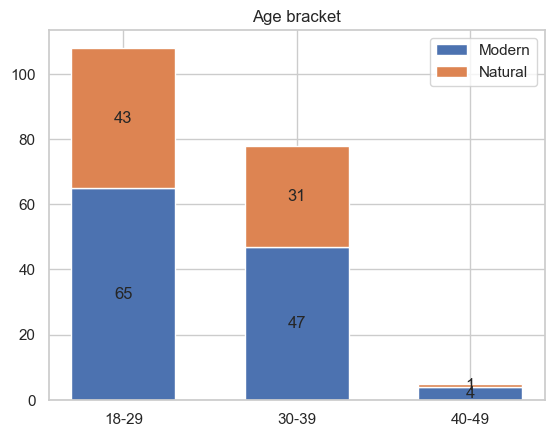

18-29 Modern - 65
30-39 Modern - 47
40-49 Modern - 4
18-29 Natural - 43
30-39 Natural - 31
40-49 Natural - 1


In [95]:
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(cdata1['age'], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(cdata1['age'], bins=age_bins, labels=new_age_labels, right=False)

a = ((cdata1['age'] >= 18) & (cdata1['age'] <= 29) & (cdata1['conversion3']  >= 1) ).sum()
b = ((cdata1['age']>= 18) & (cdata1['age'] <= 29) & (cdata1['conversion3'] < 1) ).sum()
c = ((cdata1['age']>= 30) & (cdata1['age'] <= 39) & (cdata1['conversion3'] >= 1) ).sum()
d = ((cdata1['age'] >= 30) & (cdata1['age'] <= 39) & (cdata1['conversion3'] < 1) ).sum()
e = ((cdata1['age']>= 40) & (cdata1['age'] <= 49) & (cdata1['conversion3'] >= 1) ).sum()
f = ((cdata1['age'] >= 40) & (cdata1['age'] <= 49) & (cdata1['conversion3'] < 1) ).sum()

label1 = {
    'Modern' : np.array([a,c,e]),
    'Natural' : np.array([b,d,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(age_labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

print("18-29 Modern - " + str (a))
print("30-39 Modern - " + str (c))
print("40-49 Modern - " + str (e))
print("18-29 Natural - " + str (b))
print("30-39 Natural - " + str (d))
print("40-49 Natural - " + str (f))


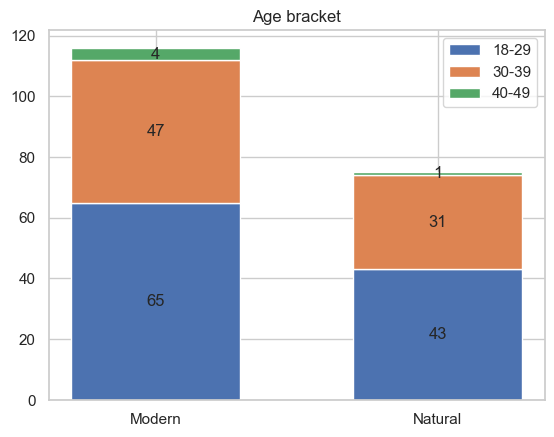

In [96]:
conv_label = ['Modern','Natural']
label1 = {
    '18-29' : np.array([a,b]),
    '30-39' : np.array([c,d]),
    '40-49' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

In [97]:
contingency_table = pd.crosstab(cdata1['age_bracket'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between the age bracket and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between the age bracket and conversion3.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
age_bracket        
0            34  59
1            40  53
2             1   4

Chi-Square Statistic: 1.6108115189716967
P-Value: 0.44690655319161743
Degrees of Freedom: 2
Expected Frequencies:
 [[36.51832461 56.48167539]
 [36.51832461 56.48167539]
 [ 1.96335079  3.03664921]]

H0: There is no significant association between the age bracket and conversion
Fail to reject the null hypothesis: No significant association found.


Age (3 padding)

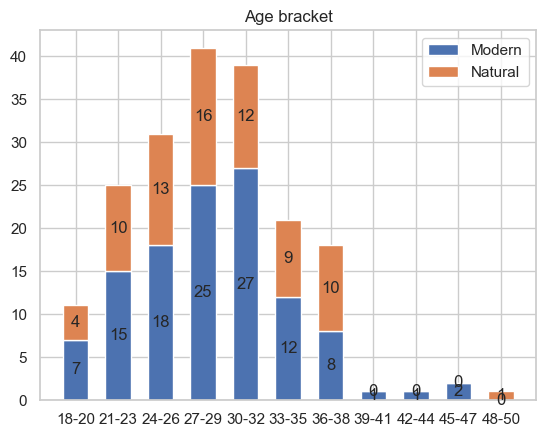

In [98]:
age_bins =[0,20,23,26,29,32,35,38,41,44,47,50]
age_labels = ['18-20','21-23','24-26','27-29','30-32','33-35','36-38','39-41','42-44','45-47','48-50']
new_age_labels = [0,1,2,3,4,5,6,7,8,9,10]
temp['age_bracket2'] = pd.cut(cdata1['age'], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket2'] = pd.cut(cdata1['age'], bins=age_bins, labels=new_age_labels, right=False)

a1 = ((cdata1['age'] >= 18) & (cdata1['age'] <= 20) & (cdata1['conversion3']  >= 1) ).sum()
b1 = ((cdata1['age'] >= 21) & (cdata1['age'] <= 23) & (cdata1['conversion3']  >= 1) ).sum()
c1 = ((cdata1['age'] >= 24) & (cdata1['age'] <= 26) & (cdata1['conversion3']  >= 1) ).sum()
d1 = ((cdata1['age'] >= 27) & (cdata1['age'] <= 29) & (cdata1['conversion3']  >= 1) ).sum()
e1 = ((cdata1['age'] >= 30) & (cdata1['age'] <= 32) & (cdata1['conversion3']  >= 1) ).sum()
f1 = ((cdata1['age'] >= 33) & (cdata1['age'] <= 35) & (cdata1['conversion3']  >= 1) ).sum()
g1 = ((cdata1['age'] >= 36) & (cdata1['age'] <= 38) & (cdata1['conversion3']  >= 1) ).sum()
h1 = ((cdata1['age'] >= 39) & (cdata1['age'] <= 41) & (cdata1['conversion3']  >= 1) ).sum()
i1 = ((cdata1['age'] >= 42) & (cdata1['age'] <= 44) & (cdata1['conversion3']  >= 1) ).sum()
j1 = ((cdata1['age'] >= 45) & (cdata1['age'] <= 47) & (cdata1['conversion3']  >= 1) ).sum()
k1 = ((cdata1['age'] >= 48) & (cdata1['age'] <= 50) & (cdata1['conversion3']  >= 1) ).sum()
a0 = ((cdata1['age'] >= 18) & (cdata1['age'] <= 20) & (cdata1['conversion3']  < 1) ).sum()
b0 = ((cdata1['age'] >= 21) & (cdata1['age'] <= 23) & (cdata1['conversion3']  < 1) ).sum()
c0 = ((cdata1['age'] >= 24) & (cdata1['age'] <= 26) & (cdata1['conversion3']  < 1) ).sum()
d0 = ((cdata1['age'] >= 27) & (cdata1['age'] <= 29) & (cdata1['conversion3']  < 1) ).sum()
e0 = ((cdata1['age'] >= 30) & (cdata1['age'] <= 32) & (cdata1['conversion3']  < 1) ).sum()
f0 = ((cdata1['age'] >= 33) & (cdata1['age'] <= 35) & (cdata1['conversion3']  < 1) ).sum()
g0 = ((cdata1['age'] >= 36) & (cdata1['age'] <= 38) & (cdata1['conversion3']  < 1) ).sum()
h0 = ((cdata1['age'] >= 39) & (cdata1['age'] <= 41) & (cdata1['conversion3']  < 1) ).sum()
i0 = ((cdata1['age'] >= 42) & (cdata1['age'] <= 44) & (cdata1['conversion3']  < 1) ).sum()
j0 = ((cdata1['age'] >= 45) & (cdata1['age'] <= 47) & (cdata1['conversion3']  < 1) ).sum()
k0 = ((cdata1['age'] >= 48) & (cdata1['age'] <= 50) & (cdata1['conversion3']  < 1) ).sum()

label1 = {
    'Modern' :  np.array([a1,b1,c1,d1,e1,f1,g1,h1,i1,j1,k1]),
    'Natural' : np.array([a0,b0,c0,d0,e0,f0,g0,h0,i0,j0,k0])
}

fig, ax = plt.subplots()
bottom = np.zeros(11)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(age_labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

In [99]:
contingency_table = pd.crosstab(cdata1['age_bracket2'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between the age bracket and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between the age bracket and conversion3.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0   1
age_bracket2        
0              1   6
1              8  11
2             13  15
3             12  27
4             17  20
5             11  22
6              7   9
7              5   3
8              0   1
9              0   2
10             1   0

Chi-Square Statistic: 10.290224481114906
P-Value: 0.4154105490032551
Degrees of Freedom: 10
Expected Frequencies:
 [[ 2.7486911   4.2513089 ]
 [ 7.46073298 11.53926702]
 [10.9947644  17.0052356 ]
 [15.31413613 23.68586387]
 [14.52879581 22.47120419]
 [12.95811518 20.04188482]
 [ 6.28272251  9.71727749]
 [ 3.14136126  4.85863874]
 [ 0.39267016  0.60732984]
 [ 0.78534031  1.21465969]
 [ 0.39267016  0.60732984]]

H0: There is no significant association between the age bracket and conversion
Fail to reject the null hypothesis: No significant association found.


Age (continous)


In [100]:
#print(cdata1['age'].max())
#print(cdata1['age'].min())
number_series = pd.Series(range(18, 50))
age_cont = number_series.to_frame(name='age')
#print(age_cont.to_markdown())
item_counts = cdata1['age'].value_counts()
#print(item_counts)
age_cont['count'] = age_cont['age'].map(item_counts)

print(age_cont.to_markdown())


|    |   age |   count |
|---:|------:|--------:|
|  0 |    18 |       2 |
|  1 |    19 |       5 |
|  2 |    20 |       4 |
|  3 |    21 |       8 |
|  4 |    22 |       7 |
|  5 |    23 |      10 |
|  6 |    24 |       7 |
|  7 |    25 |      11 |
|  8 |    26 |      13 |
|  9 |    27 |      12 |
| 10 |    28 |      14 |
| 11 |    29 |      15 |
| 12 |    30 |      17 |
| 13 |    31 |       5 |
| 14 |    32 |      17 |
| 15 |    33 |       5 |
| 16 |    34 |      11 |
| 17 |    35 |       5 |
| 18 |    36 |      11 |
| 19 |    37 |     nan |
| 20 |    38 |       7 |
| 21 |    39 |     nan |
| 22 |    40 |       1 |
| 23 |    41 |     nan |
| 24 |    42 |     nan |
| 25 |    43 |       1 |
| 26 |    44 |     nan |
| 27 |    45 |       2 |
| 28 |    46 |     nan |
| 29 |    47 |     nan |
| 30 |    48 |       1 |
| 31 |    49 |     nan |


##### Gender

male (Modern)- 30
female (Modern)- 86
male (Natural)- 36
female (Natural)- 39


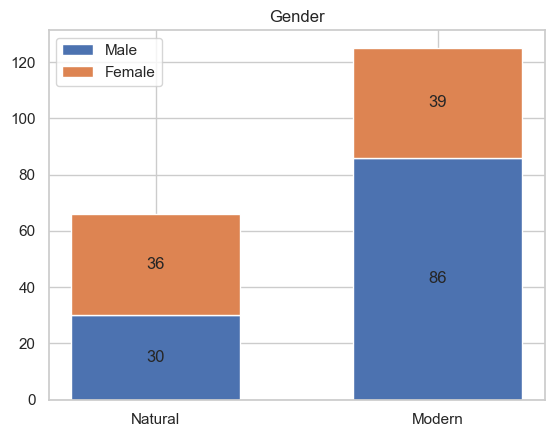

In [101]:
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['sex'] = pd.cut(cdata1['sex'], bins=sex_bins, labels=sex_labels, right=False)


a = ((cdata1['sex'] == 0) & (cdata1['conversion3'] >= 1)).sum()  # male yes
b = ((cdata1['sex'] == 1) & (cdata1['conversion3'] >= 1)).sum()  # female yes
c = ((cdata1['sex'] == 0) & (cdata1['conversion3'] < 1)).sum()   # male no
d = ((cdata1['sex'] == 1) & (cdata1['conversion3'] < 1)).sum()   # female no

conv_label = ['Natural','Modern']
label1 = {
    'Male' : np.array([a,b]),
    'Female' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (Modern)- " + str (a))
print("female (Modern)- " + str (b))
print("male (Natural)- " + str (c))
print("female (Natural)- " + str (d))


male (Modern)- 30
female (Modern)- 86
male (Natural)- 36
female (Natural)- 39


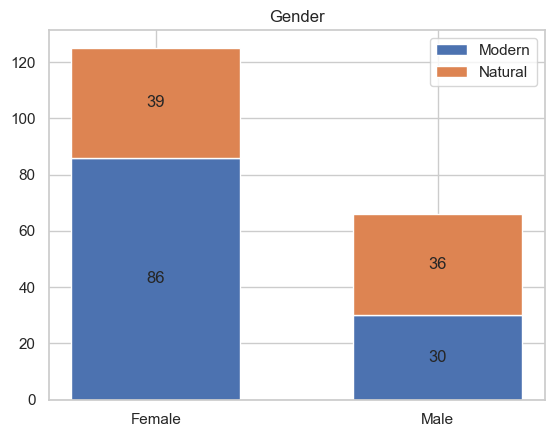

In [102]:
conv_label = ['Female','Male']
label1 = {
    'Modern' : np.array([b,a]),
    'Natural' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (Modern)- " + str (a))
print("female (Modern)- " + str (b))
print("male (Natural)- " + str (c))
print("female (Natural)- " + str (d))


In [103]:
contingency_table = pd.crosstab(cdata1['sex'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between gender and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between gender and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
sex                
0            36  30
1            39  86

Chi-Square Statistic: 8.916607143852318
P-Value: 0.0028258901679781884
Degrees of Freedom: 1
Expected Frequencies:
 [[25.91623037 40.08376963]
 [49.08376963 75.91623037]]

H0: There is no significant association between gender and conversion
Reject the null hypothesis: There is a significant association between gender and conversion1.


##### Civil Status

Single Modern- 56
Married Modern- 60
Separated Modern- 0
Widowed Modern- 0
Single Natural- 36
Married Natural- 35
Separated Natural- 0
Widowed Natural- 4


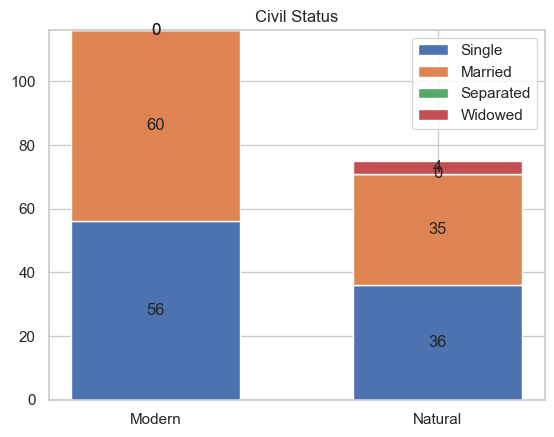

In [104]:
civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

a = ((cdata1['civil'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # Single yes
b = ((cdata1['civil'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Married yes
c = ((cdata1['civil'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Separated yes
d = ((cdata1['civil'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Widowed yes
e = ((cdata1['civil'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # Single No
f = ((cdata1['civil'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Married No
g = ((cdata1['civil'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Separated No
h = ((cdata1['civil'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Widowed No



conv_label = ['Modern','Natural']
label1 = {
    'Single' : np.array([a,e]),
    'Married' : np.array([b,f]),
    'Separated' : np.array([c,g]),
    'Widowed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single Modern- " + str (a))
print("Married Modern- " + str (b))
print("Separated Modern- " + str (c))
print("Widowed Modern- " + str (d))
print("Single Natural- " + str (e))
print("Married Natural- " + str (f))
print("Separated Natural- " + str (g))
print("Widowed Natural- " + str (h))


Single Modern- 56
Married Modern- 60
Separated Modern- 0
Widowed Modern- 0
Single Natural- 36
Married Natural- 35
Separated Natural- 0
Widowed Natural- 4


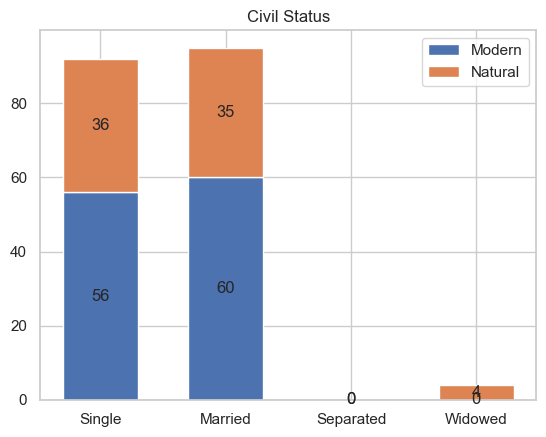

In [105]:
conv_label = ['Single','Married','Separated','Widowed']
label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single Modern- " + str (a))
print("Married Modern- " + str (b))
print("Separated Modern- " + str (c))
print("Widowed Modern- " + str (d))
print("Single Natural- " + str (e))
print("Married Natural- " + str (f))
print("Separated Natural- " + str (g))
print("Widowed Natural- " + str (h))


Single Modern- 56
Married Modern- 60
Single Natural- 36
Married Natural- 35


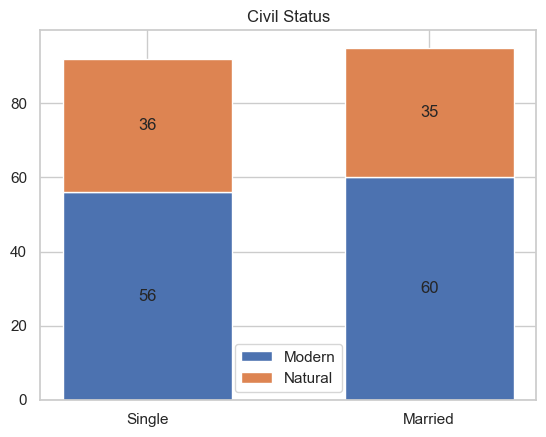

In [106]:
conv_label = ['Single','Married']
label1 = {
    'Modern' : np.array([a,b]),
    'Natural' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single Modern- " + str (a))
print("Married Modern- " + str (b))
print("Single Natural- " + str (e))
print("Married Natural- " + str (f))


In [107]:
contingency_table = pd.crosstab(cdata1['civil'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between civil status and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between civil status and conversion3.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion3   0   1
civil              
1.0          36  56
2.0          35  60
4.0           4   0

Chi-Square Statistic: 6.4216270811962435
P-Value: 0.040323794880088824
Degrees of Freedom: 2
Expected Frequencies:
 [[36.12565445 55.87434555]
 [37.30366492 57.69633508]
 [ 1.57068063  2.42931937]]

H0: There is no significant association between civil status and conversion
Reject the null hypothesis: There is a significant association between civil status and conversion3.


##### Job Type

Managerial Modern- 17
Rank-and-file Modern- 51
Self-employed Modern- 23
Student Modern- 13
Unemployed Modern- 12
Managerial Natural- 5
Rank-and-file Natural- 32
Self-employed Natural- 20
Student Natural- 5
Unemployed Natural- 13


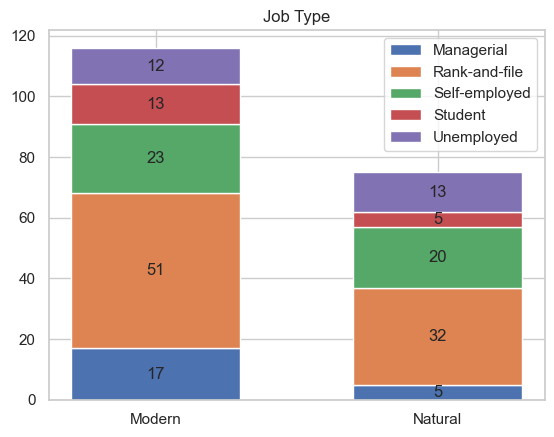

In [108]:
labels = ['Managerial','Rank-and-file','Self-employed',
          'Student','Unemployed']
bins =[1,2,3,4,5,99]
temp['job'] = pd.cut(cdata1['job'] , bins=bins, labels=labels, right=False)

a = ((cdata1['job'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # Managerial Modern
b = ((cdata1['job'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Rank-and-file Modern
c = ((cdata1['job'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Self-employed Modern
d = ((cdata1['job'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Student Modern
e = ((cdata1['job'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # Unemployed Modern
f = ((cdata1['job'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # Managerial Natural
g = ((cdata1['job'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Rank-and-file Natural
h = ((cdata1['job'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Self-employed Natural
i = ((cdata1['job'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Student Natural
j = ((cdata1['job'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # Unemployed Natural



conv_label = ['Modern','Natural']
label1 = {
    'Managerial' : np.array([a,f]),
    'Rank-and-file' : np.array([b,g]),
    'Self-employed' : np.array([c,h]),
    'Student' : np.array([d,i]),
    'Unemployed' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Job Type')
ax.legend()

print("Managerial Modern- " + str (a))
print("Rank-and-file Modern- " + str (b))
print("Self-employed Modern- " + str (c))
print("Student Modern- " + str (d))
print("Unemployed Modern- " + str (e))
print("Managerial Natural- " + str (f))
print("Rank-and-file Natural- " + str (g))
print("Self-employed Natural- " + str (h))
print("Student Natural- " + str (i))
print("Unemployed Natural- " + str (j))


Managerial Modern- 17
Rank-and-file Modern- 51
Self-employed Modern- 23
Student Modern- 13
Unemployed Modern- 12
Managerial Natural- 5
Rank-and-file Natural- 32
Self-employed Natural- 20
Student Natural- 5
Unemployed Natural- 13


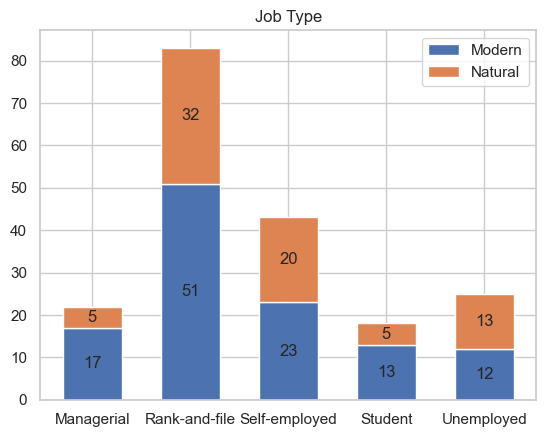

In [109]:
conv_label = labels
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Job Type')
ax.legend()

print("Managerial Modern- " + str (a))
print("Rank-and-file Modern- " + str (b))
print("Self-employed Modern- " + str (c))
print("Student Modern- " + str (d))
print("Unemployed Modern- " + str (e))
print("Managerial Natural- " + str (f))
print("Rank-and-file Natural- " + str (g))
print("Self-employed Natural- " + str (h))
print("Student Natural- " + str (i))
print("Unemployed Natural- " + str (j))

In [110]:
contingency_table = pd.crosstab(cdata1['job'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between job type and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between job type and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion3   0   1
job                
1             5  17
2            32  51
3            20  23
4             5  13
5            13  12

Chi-Square Statistic: 6.183595434725869
P-Value: 0.18585038620765054
Degrees of Freedom: 4
Expected Frequencies:
 [[ 8.63874346 13.36125654]
 [32.59162304 50.40837696]
 [16.88481675 26.11518325]
 [ 7.06806283 10.93193717]
 [ 9.81675393 15.18324607]]

H0: There is no significant association between job type and conversion
Fail to reject the null hypothesis: No significant association found.


##### Educational Attainment

College grad Modern- 67
Post-grad Modern- 2
Voc Modern- 25
Elementary Modern- 1
High School Modern- 21
College grad Natural- 27
Post-grad Natural- 2
Voc Natural- 18
Elementary Natural- 3
High School Natural- 24


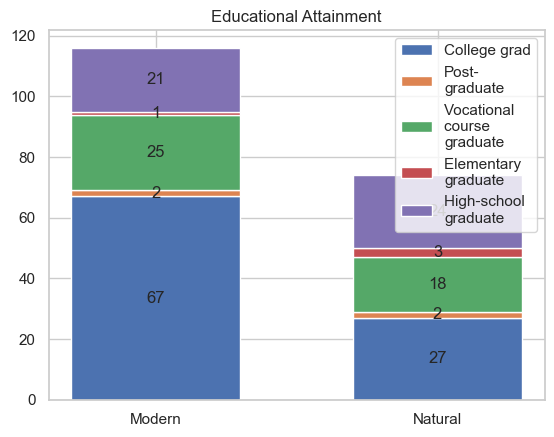

In [111]:
labels = ['College grad','Post-\ngraduate','Vocational \ncourse \ngraduate','Elementary \ngraduate','High-school \ngraduate']
bins =[1,2,3,4,5,6]
temp['educ'] = pd.cut(cdata1['educ'], bins=bins, labels=labels, right=False)

a = ((cdata1['educ'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # College Modern
b = ((cdata1['educ'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Post-grad Modern
c = ((cdata1['educ'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Voc Modern
d = ((cdata1['educ'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Elem Modern
e = ((cdata1['educ'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # HS Modern
f = ((cdata1['educ'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # College Natural
g = ((cdata1['educ'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Post-grad Natural
h = ((cdata1['educ'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Voc Natural
i = ((cdata1['educ'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Elem Natural
j = ((cdata1['educ'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # HS Natural


conv_label = ['Modern','Natural']
label1 = {
    'College grad' : np.array([a,f]),
    'Post-\ngraduate' : np.array([b,g]),
    'Vocational \ncourse \ngraduate' : np.array([c,h]),
    'Elementary \ngraduate' : np.array([d,i]),
    'High-school \ngraduate' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Educational Attainment')
ax.legend()

print("College grad Modern- " + str (a))
print("Post-grad Modern- " + str (b))
print("Voc Modern- " + str (c))
print("Elementary Modern- " + str (d))
print("High School Modern- " + str (e))
print("College grad Natural- " + str (f))
print("Post-grad Natural- " + str (g))
print("Voc Natural- " + str (h))
print("Elementary Natural- " + str (i))
print("High School Natural- " + str (j))



College grad Modern- 67
Post-grad Modern- 2
Voc Modern- 25
Elementary Modern- 1
High School Modern- 21
College grad Natural- 27
Post-grad Natural- 2
Voc Natural- 18
Elementary Natural- 3
High School Natural- 24


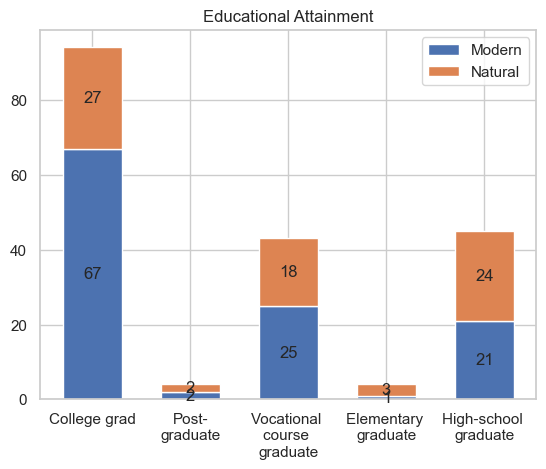

In [112]:
conv_label = labels
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Educational Attainment')
ax.legend()

print("College grad Modern- " + str (a))
print("Post-grad Modern- " + str (b))
print("Voc Modern- " + str (c))
print("Elementary Modern- " + str (d))
print("High School Modern- " + str (e))
print("College grad Natural- " + str (f))
print("Post-grad Natural- " + str (g))
print("Voc Natural- " + str (h))
print("Elementary Natural- " + str (i))
print("High School Natural- " + str (j))


In [113]:
contingency_table = pd.crosstab(cdata1['job'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between educational attainment and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between educational attainment and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
job                
1             5  17
2            32  51
3            20  23
4             5  13
5            13  12

Chi-Square Statistic: 6.183595434725869
P-Value: 0.18585038620765054
Degrees of Freedom: 4
Expected Frequencies:
 [[ 8.63874346 13.36125654]
 [32.59162304 50.40837696]
 [16.88481675 26.11518325]
 [ 7.06806283 10.93193717]
 [ 9.81675393 15.18324607]]

H0: There is no significant association between educational attainment and conversion
Fail to reject the null hypothesis: No significant association found.


##### Gender Identification

Female Modern- 83
Male Modern- 28
LGBTQIA+ Modern- 4
Undisclosed Modern- 1
Female Natural- 37
Male Natural- 34
LGBTQIA+ Natural- 3
Undisclosed Natural- 1


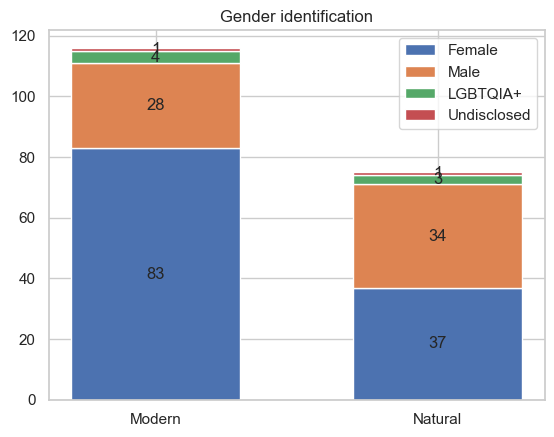

In [114]:
labels = ['Female','Male','LGBTQIA+','Undisclosed']
bins =[1,2,3,4,99]
temp['genderid'] = pd.cut(cdata1['genderid'], bins=bins, labels=labels, right=False)

a = ((cdata1['genderid'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # Female Modern
b = ((cdata1['genderid'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Male Modern
c = ((cdata1['genderid'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # LGBTQIA+ Modern
d = ((cdata1['genderid'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Undisclosed Modern
e = ((cdata1['genderid'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # Female Natural
f = ((cdata1['genderid'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Male Natural
g = ((cdata1['genderid'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # LGBTQIA+ Natural
h = ((cdata1['genderid'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Undisclosed Natural



conv_label = ['Modern','Natural']
label1 = {
    'Female' : np.array([a,e]),
    'Male' : np.array([b,f]),
    'LGBTQIA+' : np.array([c,g]),
    'Undisclosed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender identification')
ax.legend()

print("Female Modern- " + str (a))
print("Male Modern- " + str (b))
print("LGBTQIA+ Modern- " + str (c))
print("Undisclosed Modern- " + str (d))
print("Female Natural- " + str (e))
print("Male Natural- " + str (f))
print("LGBTQIA+ Natural- " + str (g))
print("Undisclosed Natural- " + str (h))


Female Modern- 83
Male Modern- 28
LGBTQIA+ Modern- 4
Undisclosed Modern- 1
Female Natural- 37
Male Natural- 34
LGBTQIA+ Natural- 3
Undisclosed Natural- 1


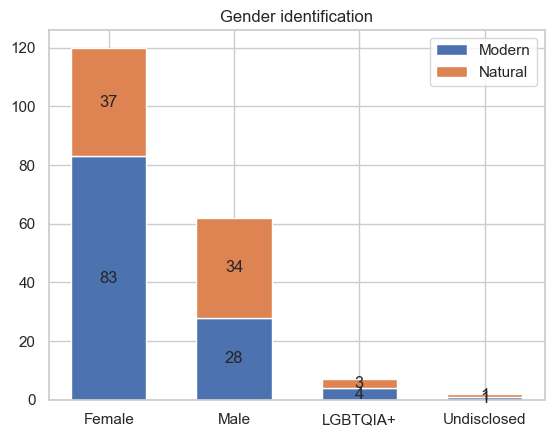

In [115]:
conv_label = ['Female','Male','LGBTQIA+','Undisclosed']
label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender identification')
ax.legend()

print("Female Modern- " + str (a))
print("Male Modern- " + str (b))
print("LGBTQIA+ Modern- " + str (c))
print("Undisclosed Modern- " + str (d))
print("Female Natural- " + str (e))
print("Male Natural- " + str (f))
print("LGBTQIA+ Natural- " + str (g))
print("Undisclosed Natural- " + str (h))

In [116]:
contingency_table = pd.crosstab(cdata1['job'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between gender identification and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between gender identification and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
job                
1             5  17
2            32  51
3            20  23
4             5  13
5            13  12

Chi-Square Statistic: 6.183595434725869
P-Value: 0.18585038620765054
Degrees of Freedom: 4
Expected Frequencies:
 [[ 8.63874346 13.36125654]
 [32.59162304 50.40837696]
 [16.88481675 26.11518325]
 [ 7.06806283 10.93193717]
 [ 9.81675393 15.18324607]]

H0: There is no significant association between gender identification and conversion
Fail to reject the null hypothesis: No significant association found.


##### Location

NCR Modern- 62
Luzon Modern- 24
Visayas Modern- 9
Mindanao Modern- 21
NCR Natural- 56
Luzon Natural- 14
Visayas Natural- 0
Mindanao Natural- 5


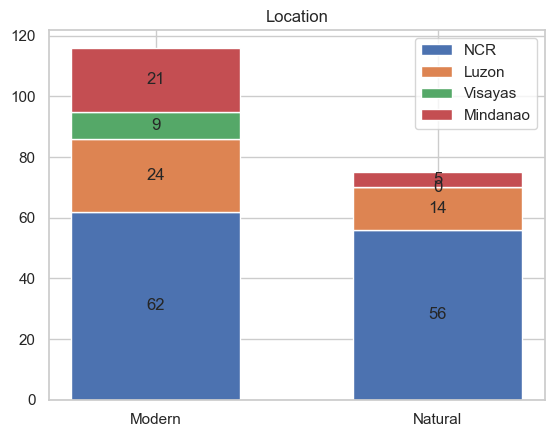

In [117]:

labels = ['NCR','Luzon','Visayas','Mindanao']
bins =[1,2,3,4,99]
temp['loc'] = pd.cut(cdata1['loc'], bins=bins, labels=labels, right=False)

a = ((cdata1['loc'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # NCR Modern
b = ((cdata1['loc'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Luzon Modern
c = ((cdata1['loc'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Visayas Modern
d = ((cdata1['loc'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Mindanao Modern
e = ((cdata1['loc'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # NCR Natural
f = ((cdata1['loc'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Luzon Natural
g = ((cdata1['loc'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Visayas Natural
h = ((cdata1['loc'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Mindanao Natural



conv_label = ['Modern','Natural']
label1 = {
    'NCR' : np.array([a,e]),
    'Luzon' : np.array([b,f]),
    'Visayas' : np.array([c,g]),
    'Mindanao' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Location')
ax.legend()

print("NCR Modern- " + str (a))
print("Luzon Modern- " + str (b))
print("Visayas Modern- " + str (c))
print("Mindanao Modern- " + str (d))
print("NCR Natural- " + str (e))
print("Luzon Natural- " + str (f))
print("Visayas Natural- " + str (g))
print("Mindanao Natural- " + str (h))



NCR Modern- 62
Luzon Modern- 24
Visayas Modern- 9
Mindanao Modern- 21
NCR Natural- 56
Luzon Natural- 14
Visayas Natural- 0
Mindanao Natural- 5


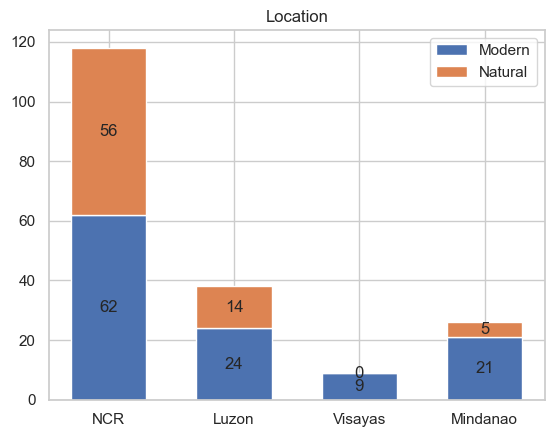

In [118]:
conv_label = ['NCR','Luzon','Visayas','Mindanao']
label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Location')
ax.legend()

print("NCR Modern- " + str (a))
print("Luzon Modern- " + str (b))
print("Visayas Modern- " + str (c))
print("Mindanao Modern- " + str (d))
print("NCR Natural- " + str (e))
print("Luzon Natural- " + str (f))
print("Visayas Natural- " + str (g))
print("Mindanao Natural- " + str (h))


In [119]:
contingency_table = pd.crosstab(cdata1['loc'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between location and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between location and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
loc                
1            56  62
2            14  24
3             0   9
4             5  21

Chi-Square Statistic: 13.608849616398143
P-Value: 0.0034889449736518513
Degrees of Freedom: 3
Expected Frequencies:
 [[46.33507853 71.66492147]
 [14.92146597 23.07853403]
 [ 3.53403141  5.46596859]
 [10.20942408 15.79057592]]

H0: There is no significant association between location and conversion
Reject the null hypothesis: There is a significant association between location and conversion1.


Job type and Education

In [120]:
temp['job'] = label_encoder.fit_transform(cdata1['job'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])


X = temp[['job','educ']]
y = temp['conversion3']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nJob type and education vs Conversion 3:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.669876
         Iterations 5


Job type and education vs Conversion 3:

                           Logit Regression Results                           
Dep. Variable:            conversion3   No. Observations:                  191
Model:                          Logit   Df Residuals:                      189
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:               7.672e-05
Time:                        16:37:18   Log-Likelihood:                -127.95
converged:                       True   LL-Null:                       -127.96
Covariance Type:            nonrobust   LLR p-value:                    0.8886
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
job            0.3519      0.124      2.845      0.004       0.10

##### Results

In [121]:
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['sex'] = label_encoder.fit_transform(cdata1['sex'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job'] = label_encoder.fit_transform(cdata1['job'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])
temp['genderid'] = label_encoder.fit_transform(cdata1['genderid'])
temp['loc'] = label_encoder.fit_transform(cdata1['loc'])


X = temp[['age_bracket', 'sex', 'civil', 'job','educ','genderid','loc']]
y = temp['conversion3']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 3:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.588864
         Iterations 6


Demographics vs Conversion 3:

                           Logit Regression Results                           
Dep. Variable:            conversion3   No. Observations:                  191
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.1210
Time:                        16:37:18   Log-Likelihood:                -112.47
converged:                       True   LL-Null:                       -127.96
Covariance Type:            nonrobust   LLR p-value:                 2.573e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.4141      0.293     -1.413      0.158      -0.988      

significant (p<0.05): 
* female (gender), 
* educ (educational attainment)
* loc (location) 

#### Other Features

##### Devices

Others (Modern)- 7
Smartphone (Modern)- 109
Others (Natural)- 8
Smartphone (Natural)- 67


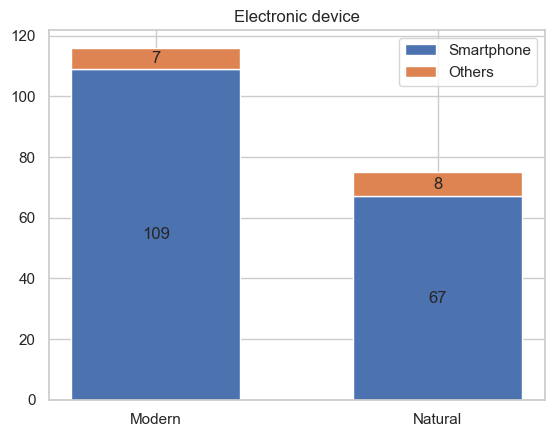

In [122]:
labels = ['Others','Smartphone']
bins =[0,1,99]
temp['device'] = pd.cut(cdata1['device'], bins=bins, labels=labels, right=False)


a = ((cdata1['device'] == 0) & (cdata1['conversion3'] >= 1)).sum()  # Others Modern
b = ((cdata1['device'] == 1) & (cdata1['conversion3'] >= 1)).sum()  # Smartphone Modern
c = ((cdata1['device'] == 0) & (cdata1['conversion3'] < 1)).sum()   # Others Natural
d = ((cdata1['device'] == 1) & (cdata1['conversion3'] < 1)).sum()   # Smartphone Natural

conv_label = ['Modern','Natural']
label1 = {
    'Smartphone' : np.array([b,d]),
    'Others' : np.array([a,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Electronic device')
ax.legend()

print("Others (Modern)- " + str (a))
print("Smartphone (Modern)- " + str (b))
print("Others (Natural)- " + str (c))
print("Smartphone (Natural)- " + str (d))

Others (Modern)- 7
Smartphone (Modern)- 109
Others (Natural)- 8
Smartphone (Natural)- 67


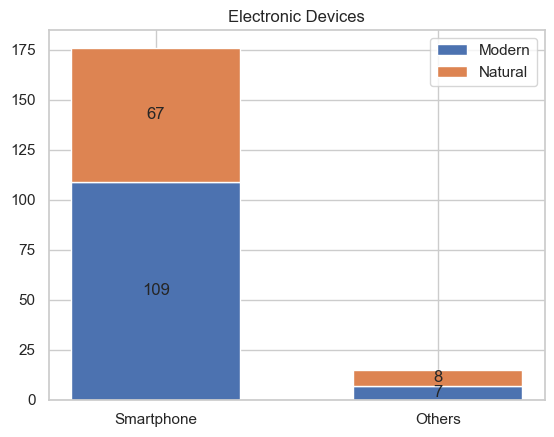

In [123]:

conv_label = ['Smartphone','Others']
label1 = {
    'Modern' : np.array([b,a]),
    'Natural' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Electronic Devices')
ax.legend()


print("Others (Modern)- " + str (a))
print("Smartphone (Modern)- " + str (b))
print("Others (Natural)- " + str (c))
print("Smartphone (Natural)- " + str (d))

In [124]:
contingency_table = pd.crosstab(cdata1['device'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between devices used and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between devices used and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0    1
device              
0             8    7
1            67  109

Chi-Square Statistic: 0.7863220023510967
P-Value: 0.3752145934072346
Degrees of Freedom: 1
Expected Frequencies:
 [[  5.89005236   9.10994764]
 [ 69.10994764 106.89005236]]

H0: There is no significant association between devices used and conversion
Fail to reject the null hypothesis: No significant association found.


##### Purpose of Visit

recomendation Modern- 18
exploring Modern- 52
want to kNaturalw Modern- 32
attracted Modern- 14
recomendation Natural- 21
exploring Natural- 27
want to kNaturalw Natural- 15
attracted Natural- 12


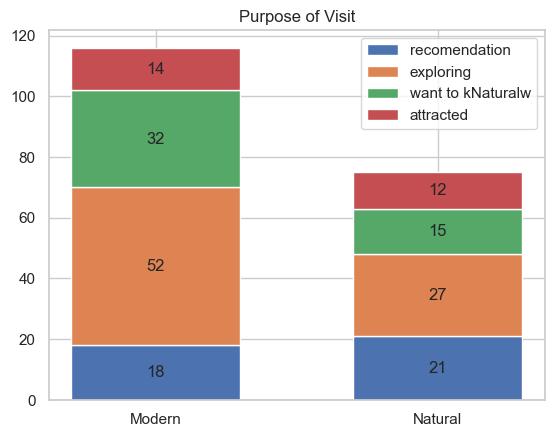

In [125]:
labels = ['A friend/relative recommended me to visit this page',
          'I am exploring using a Family Planning (FP) product or service and i want to kNaturalw what is right for me',
          'I want to kNaturalw the health facilities offering the Family Planning services near me',
          'I was visually attracted to the posted materials']
bins =[1,2,3,4,99]
temp['purpose'] = pd.cut(cdata1['purpose'], bins=bins, labels=labels, right=False)

a = ((cdata1['purpose'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # recomendation Modern
b = ((cdata1['purpose'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # exploring Modern
c = ((cdata1['purpose'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # want to kNaturalw Modern
d = ((cdata1['purpose'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # attracted Modern
e = ((cdata1['purpose'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # recomendation Natural
f = ((cdata1['purpose'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # exploring Natural
g = ((cdata1['purpose'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # want to kNaturalw Natural
h = ((cdata1['purpose'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # attracted Natural



conv_label = ['Modern','Natural']
label1 = {
    'recomendation' : np.array([a,e]),
    'exploring' : np.array([b,f]),
    'want to kNaturalw' : np.array([c,g]),
    'attracted' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Purpose of Visit')
ax.legend()

print("recomendation Modern- " + str (a))
print("exploring Modern- " + str (b))
print("want to kNaturalw Modern- " + str (c))
print("attracted Modern- " + str (d))
print("recomendation Natural- " + str (e))
print("exploring Natural- " + str (f))
print("want to kNaturalw Natural- " + str (g))
print("attracted Natural- " + str (h))



recomendation Modern- 18
exploring Modern- 52
want to kNaturalw Modern- 32
attracted Modern- 14
recomendation Natural- 21
exploring Natural- 27
want to kNaturalw Natural- 15
attracted Natural- 12


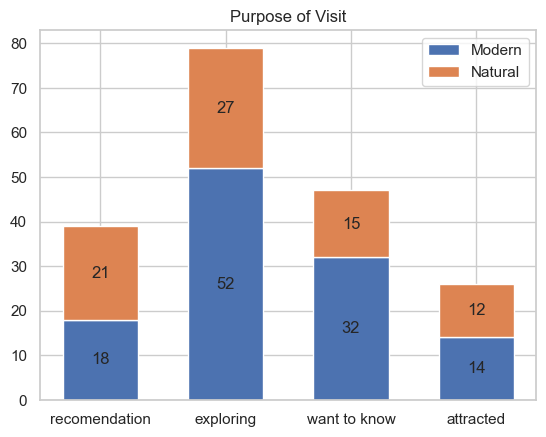

In [126]:
conv_label = ['recomendation','exploring', 'want to know','attracted']

label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Purpose of Visit')
ax.legend()

print("recomendation Modern- " + str (a))
print("exploring Modern- " + str (b))
print("want to kNaturalw Modern- " + str (c))
print("attracted Modern- " + str (d))
print("recomendation Natural- " + str (e))
print("exploring Natural- " + str (f))
print("want to kNaturalw Natural- " + str (g))
print("attracted Natural- " + str (h))

In [127]:
contingency_table = pd.crosstab(cdata1['purpose'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between purpose of visit and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between purpose of visit and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
purpose            
1            21  18
2            27  52
3            15  32
4            12  14

Chi-Square Statistic: 5.916523005770106
P-Value: 0.11574295151710862
Degrees of Freedom: 3
Expected Frequencies:
 [[15.31413613 23.68586387]
 [31.02094241 47.97905759]
 [18.45549738 28.54450262]
 [10.20942408 15.79057592]]

H0: There is no significant association between purpose of visit and conversion
Fail to reject the null hypothesis: No significant association found.


##### Perceived RH needs

inform Modern- 65
explore Modern- 17
limit Modern- 10
practice Modern- 21
satisfy Modern- 3
inform Natural- 37
explore Natural- 18
limit Natural- 6
practice Natural- 11
satisfy Natural- 3


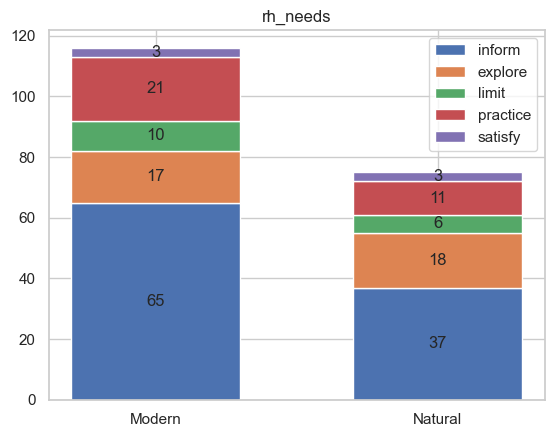

In [128]:
labels = ['I want to be informed about reproductive health and family planning',
          'I am exploring using a Family Planning (FP) product or service and i want to kNaturalw what is right for me',
          'I want to limit the number of children',
          'I want to practice safe sex without getting pregnant ',
          'I want to satisfy my partner’s needs']
bins =[1,2,3,4,5,6]
temp['rh_needs'] = pd.cut(cdata1['rh_needs'], bins=bins, labels=labels, right=False)

a = ((cdata1['rh_needs'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # inform Modern
b = ((cdata1['rh_needs'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # explore Modern
c = ((cdata1['rh_needs'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # limit Modern
d = ((cdata1['rh_needs'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # practice Modern
e = ((cdata1['rh_needs'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # satisfy Modern
f = ((cdata1['rh_needs'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # inform Natural
g = ((cdata1['rh_needs'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # explore Natural
h = ((cdata1['rh_needs'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # limit Natural
i = ((cdata1['rh_needs'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # practice Natural
j = ((cdata1['rh_needs'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # satisfy Natural


conv_label = ['Modern','Natural']
label1 = {
    'inform' : np.array([a,f]),
    'explore' : np.array([b,g]),
    'limit' : np.array([c,h]),
    'practice' : np.array([d,i]),
    'satisfy' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('rh_needs')
ax.legend()

print("inform Modern- " + str (a))
print("explore Modern- " + str (b))
print("limit Modern- " + str (c))
print("practice Modern- " + str (d))
print("satisfy Modern- " + str (e))
print("inform Natural- " + str (f))
print("explore Natural- " + str (g))
print("limit Natural- " + str (h))
print("practice Natural- " + str (i))
print("satisfy Natural- " + str (j))



inform Modern- 65
explore Modern- 17
limit Modern- 10
practice Modern- 21
satisfy Modern- 3
inform Natural- 37
explore Natural- 18
limit Natural- 6
practice Natural- 11
satisfy Natural- 3


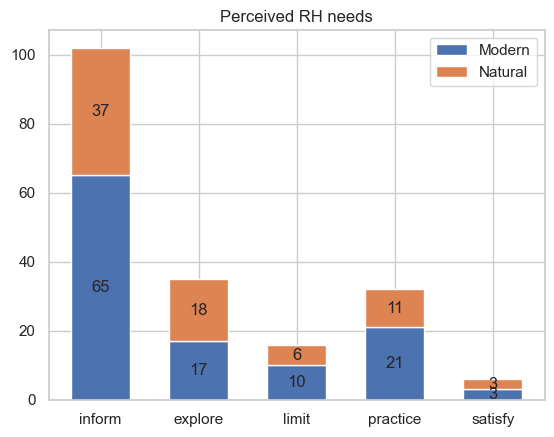

In [129]:
conv_label = ['inform','explore','limit','practice','satisfy']
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}


fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Perceived RH needs')
ax.legend()

print("inform Modern- " + str (a))
print("explore Modern- " + str (b))
print("limit Modern- " + str (c))
print("practice Modern- " + str (d))
print("satisfy Modern- " + str (e))
print("inform Natural- " + str (f))
print("explore Natural- " + str (g))
print("limit Natural- " + str (h))
print("practice Natural- " + str (i))
print("satisfy Natural- " + str (j))


In [130]:
contingency_table = pd.crosstab(cdata1['rh_needs'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between Perceived RH needs and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Perceived RH needs and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
rh_needs           
1            37  65
2            18  17
3             6  10
4            11  21
5             3   3

Chi-Square Statistic: 3.1855867723526203
P-Value: 0.5272620717624543
Degrees of Freedom: 4
Expected Frequencies:
 [[40.05235602 61.94764398]
 [13.7434555  21.2565445 ]
 [ 6.28272251  9.71727749]
 [12.56544503 19.43455497]
 [ 2.35602094  3.64397906]]

H0: There is no significant association between Perceived RH needs and conversion
Fail to reject the null hypothesis: No significant association found.


##### No. of Benefits of using FP

1 Modern- 36
2 Modern- 19
3 Modern- 12
4 Modern- 4
5 Modern- 45
1 Natural- 40
2 Natural- 11
3 Natural- 7
4 Natural- 2
5 Natural- 15


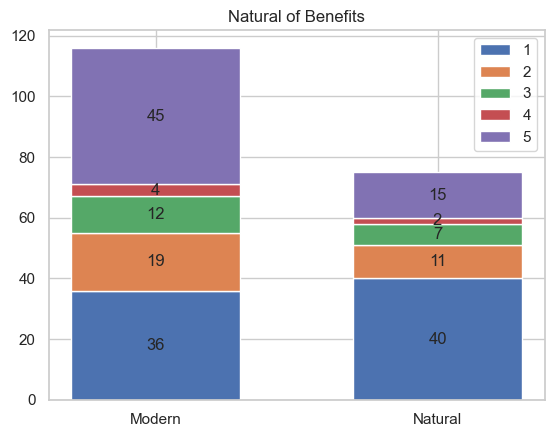

In [131]:
a = ((cdata1['benefit'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['benefit'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['benefit'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['benefit'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['benefit'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['benefit'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
g = ((cdata1['benefit'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
h = ((cdata1['benefit'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
i = ((cdata1['benefit'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
j = ((cdata1['benefit'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural


conv_label = ['Modern','Natural']
label1 = {
    '1' : np.array([a,f]),
    '2' : np.array([b,g]),
    '3' : np.array([c,h]),
    '4' : np.array([d,i]),
    '5' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Natural of Benefits')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

1 Modern- 36
2 Modern- 19
3 Modern- 12
4 Modern- 4
5 Modern- 45
1 Natural- 40
2 Natural- 11
3 Natural- 7
4 Natural- 2
5 Natural- 15


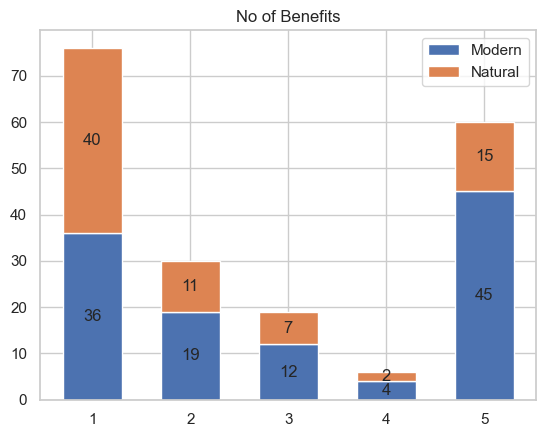

In [132]:
conv_label = ['1','2','3','4','5']
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}


fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('No of Benefits')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

In [133]:
contingency_table = pd.crosstab(cdata1['benefit'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between No of FP benefits and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between No of FP benefits and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
benefit            
1            40  36
2            11  19
3             7  12
4             2   4
5            15  45

Chi-Square Statistic: 11.033687537810046
P-Value: 0.026188010310383168
Degrees of Freedom: 4
Expected Frequencies:
 [[29.84293194 46.15706806]
 [11.78010471 18.21989529]
 [ 7.46073298 11.53926702]
 [ 2.35602094  3.64397906]
 [23.56020942 36.43979058]]

H0: There is no significant association between No of FP benefits and conversion
Reject the null hypothesis: There is a significant association between No of FP benefits and conversion.


##### No. of platforms visited

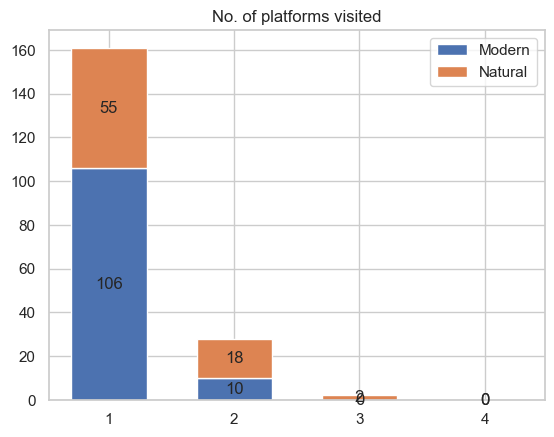

1 Modern- 106
2 Modern- 10
3 Modern- 0
4 Modern- 0
1 Natural- 55
2 Natural- 18
3 Natural- 2
4 Natural- 0


In [134]:
a = ((cdata1['platforms'] == 1 )  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['platforms'] == 2 )  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['platforms'] == 3 )  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['platforms'] == 4 )  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['platforms'] == 1 )  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
f = ((cdata1['platforms'] == 2 )  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
g = ((cdata1['platforms'] == 3 )  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
h = ((cdata1['platforms'] == 4 )  & (cdata1['conversion3'] < 1) ).sum() # 4 nbo

labels = ['1','2','3','4']

label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('No. of platforms visited')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))


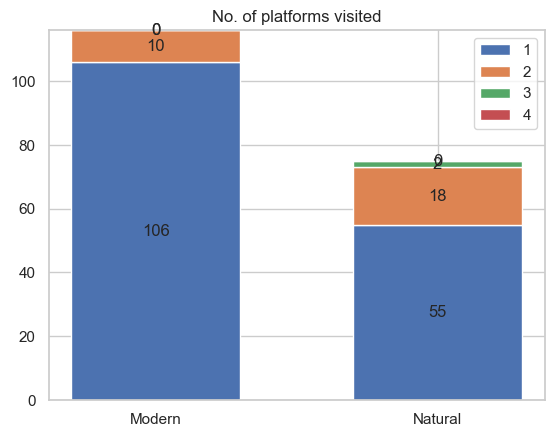

1 Modern- 106
2 Modern- 10
3 Modern- 0
4 Modern- 0
1 Natural- 55
2 Natural- 18
3 Natural- 2
4 Natural- 0


In [135]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,e]),
    '2' : np.array([b,f]),
    '3' : np.array([c,g]),
    '4' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('No. of platforms visited')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))

In [136]:
contingency_table = pd.crosstab(cdata1['platforms'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between No of platforms visited and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between No of platforms visited and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0    1
platforms           
1            55  106
2            18   10
3             2    0

Chi-Square Statistic: 12.202209609480974
P-Value: 0.0022403911569079723
Degrees of Freedom: 2
Expected Frequencies:
 [[63.21989529 97.78010471]
 [10.9947644  17.0052356 ]
 [ 0.78534031  1.21465969]]

H0: There is no significant association between No of platforms visited and conversion
Reject the null hypothesis: There is a significant association between No of platforms visited and conversion.


##### Frequency of Visit to page

1 Modern- 12
2 Modern- 28
3 Modern- 41
4 Modern- 26
5 Modern- 9
1 Natural- 10
2 Natural- 30
3 Natural- 10
4 Natural- 16
5 Natural- 9


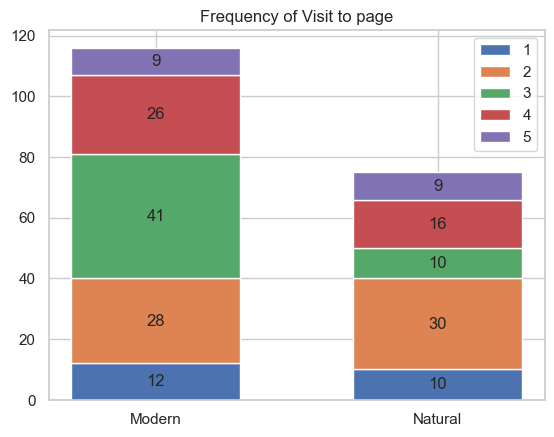

In [137]:
a = ((cdata1['oftenvisit'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['oftenvisit'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['oftenvisit'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['oftenvisit'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['oftenvisit'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['oftenvisit'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
g = ((cdata1['oftenvisit'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
h = ((cdata1['oftenvisit'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
i = ((cdata1['oftenvisit'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
j = ((cdata1['oftenvisit'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural


conv_label = ['Modern','Natural']
label1 = {
    '1' : np.array([a,f]),
    '2' : np.array([b,g]),
    '3' : np.array([c,h]),
    '4' : np.array([d,i]),
    '5' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Frequency of Visit to page')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

1 Modern- 12
2 Modern- 28
3 Modern- 41
4 Modern- 26
5 Modern- 9
1 Natural- 10
2 Natural- 30
3 Natural- 10
4 Natural- 16
5 Natural- 9


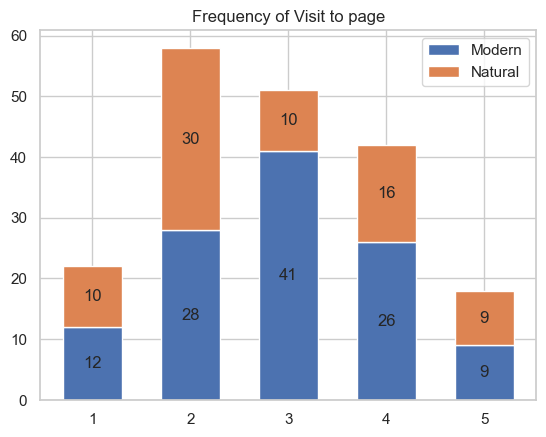

In [138]:
conv_label = ['1','2','3','4','5']


label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Frequency of Visit to page')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

In [139]:
contingency_table = pd.crosstab(cdata1['oftenvisit'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between Frequency of Visit and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Frequency of Visit and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
oftenvisit         
1            10  12
2            30  28
3            10  41
4            16  26
5             9   9

Chi-Square Statistic: 13.286030291120523
P-Value: 0.009959554197480859
Degrees of Freedom: 4
Expected Frequencies:
 [[ 8.63874346 13.36125654]
 [22.77486911 35.22513089]
 [20.02617801 30.97382199]
 [16.4921466  25.5078534 ]
 [ 7.06806283 10.93193717]]

H0: There is no significant association between Frequency of Visit and conversion
Reject the null hypothesis: There is a significant association between Frequency of Visit and conversion.


##### How did you learn about FP pages? 

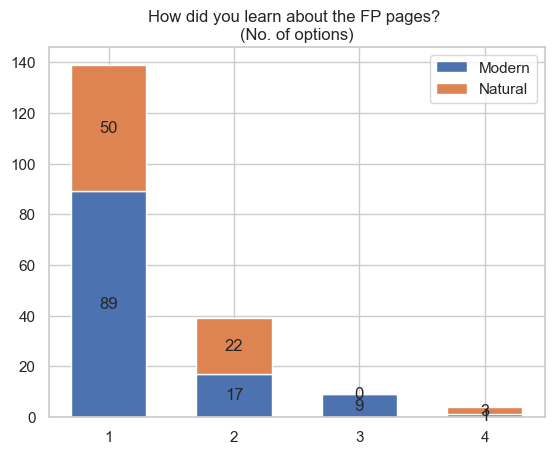

1 Modern- 89
2 Modern- 17
3 Modern- 9
4 Modern- 1
1 Natural- 50
2 Natural- 22
3 Natural- 0
4 Natural- 3


In [140]:
a = ((cdata1['learnpage'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['learnpage'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['learnpage'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['learnpage'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['learnpage'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
f = ((cdata1['learnpage'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
g = ((cdata1['learnpage'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
h = ((cdata1['learnpage'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural

labels = ['1','2','3','4']

label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('How did you learn about the FP pages? \n(No. of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))


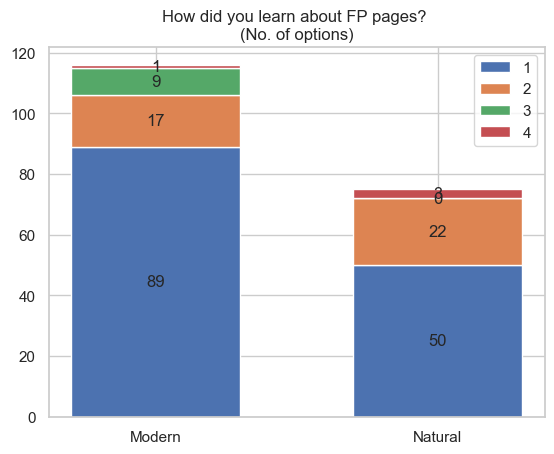

1 Modern- 89
2 Modern- 17
3 Modern- 9
4 Modern- 1
1 Natural- 50
2 Natural- 22
3 Natural- 0
4 Natural- 3


In [61]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,e]),
    '2' : np.array([b,f]),
    '3' : np.array([c,g]),
    '4' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('How did you learn about FP pages? \n(No. of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))

In [62]:
contingency_table = pd.crosstab(cdata1['learnpage'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between how did you learn about FB pages and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between how did you learn about FB pages and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
learnpage          
1            50  89
2            22  17
3             0   9
4             3   1

Chi-Square Statistic: 13.39987443997057
P-Value: 0.003847020016271707
Degrees of Freedom: 3
Expected Frequencies:
 [[54.58115183 84.41884817]
 [15.31413613 23.68586387]
 [ 3.53403141  5.46596859]
 [ 1.57068063  2.42931937]]

H0: There is no significant association between how did you learn about FB pages and conversion
Reject the null hypothesis: There is a significant association between how did you learn about FB pages and conversion.


##### What type of post were you able to like in terms of contents? (multiple entries)

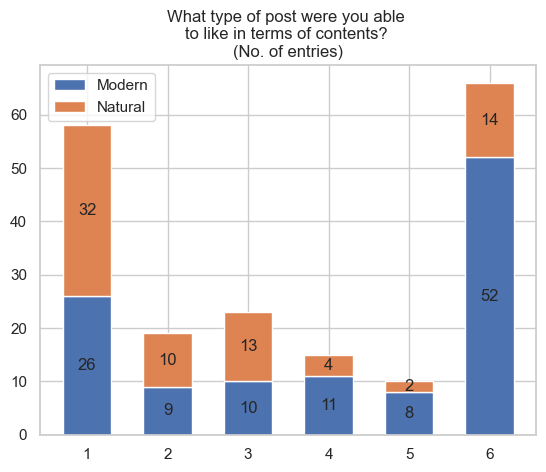

1 Modern- 26
2 Modern- 9
3 Modern- 10
4 Modern- 11
5 Modern- 8
6 Modern- 52
1 Natural- 32
2 Natural- 10
3 Natural- 13
4 Natural- 4
5 Natural- 2
6 Natural- 14


In [63]:
a = ((cdata1['contents'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['contents'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['contents'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['contents'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['contents'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['contents'] == 6)  & (cdata1['conversion3'] >= 1) ).sum() # 6 Modern
g = ((cdata1['contents'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
h = ((cdata1['contents'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
i = ((cdata1['contents'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
j = ((cdata1['contents'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
k = ((cdata1['contents'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural
l = ((cdata1['contents'] == 6)  & (cdata1['conversion3'] < 1) ).sum() # 6 Natural

labels = ['1','2','3','4','5','6']

label1 = {
    'Modern' : np.array([a,b,c,d,e,f]),
    'Natural' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of contents? \n(No. of entries)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

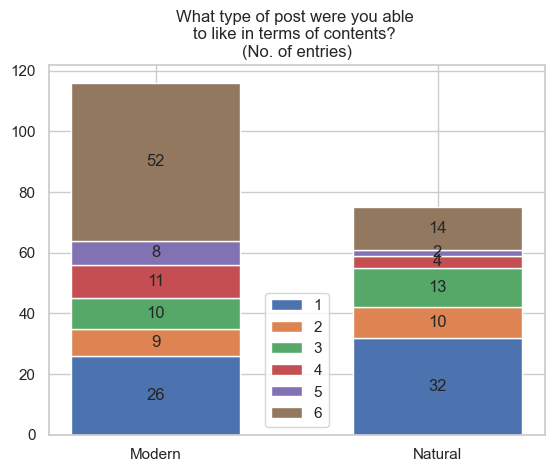

1 Modern- 26
2 Modern- 9
3 Modern- 10
4 Modern- 11
5 Modern- 8
6 Modern- 52
1 Natural- 32
2 Natural- 10
3 Natural- 13
4 Natural- 4
5 Natural- 2
6 Natural- 14


In [64]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,g]),
    '2' : np.array([b,h]),
    '3' : np.array([c,i]),
    '4' : np.array([d,j]),
    '5' : np.array([e,k]),
    '6' : np.array([f,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of contents? \n(No. of entries)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

In [65]:
contingency_table = pd.crosstab(cdata1['contents'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between no of visuals contents and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between no of visuals contents and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
contents           
1            32  26
2            10   9
3            13  10
4             4  11
5             2   8
6            14  52

Chi-Square Statistic: 22.02386589447398
P-Value: 0.0005181567340603773
Degrees of Freedom: 5
Expected Frequencies:
 [[22.77486911 35.22513089]
 [ 7.46073298 11.53926702]
 [ 9.03141361 13.96858639]
 [ 5.89005236  9.10994764]
 [ 3.92670157  6.07329843]
 [25.91623037 40.08376963]]

H0: There is no significant association between no of visuals contents and conversion
Reject the null hypothesis: There is a significant association between no of visuals contents and conversion.


##### What type of post were you able to like in terms of visuals/audio? (multiple entries)

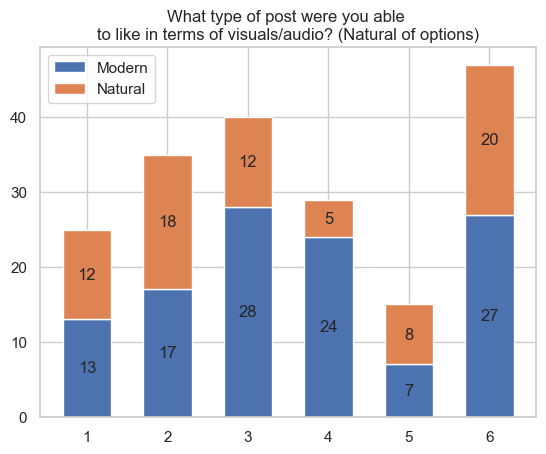

1 Modern- 13
2 Modern- 17
3 Modern- 28
4 Modern- 24
5 Modern- 7
6 Modern- 27
1 Natural- 12
2 Natural- 18
3 Natural- 12
4 Natural- 5
5 Natural- 8
6 Natural- 20


In [66]:
a = ((cdata1['visuals'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['visuals'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['visuals'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['visuals'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['visuals'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['visuals'] == 6)  & (cdata1['conversion3'] >= 1) ).sum() # 6 Modern
g = ((cdata1['visuals'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
h = ((cdata1['visuals'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
i = ((cdata1['visuals'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
j = ((cdata1['visuals'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
k = ((cdata1['visuals'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural
l = ((cdata1['visuals'] == 6)  & (cdata1['conversion3'] < 1) ).sum() # 6 Natural

labels = ['1','2','3','4','5','6']

label1 = {
    'Modern' : np.array([a,b,c,d,e,f]),
    'Natural' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of visuals/audio? (Natural of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

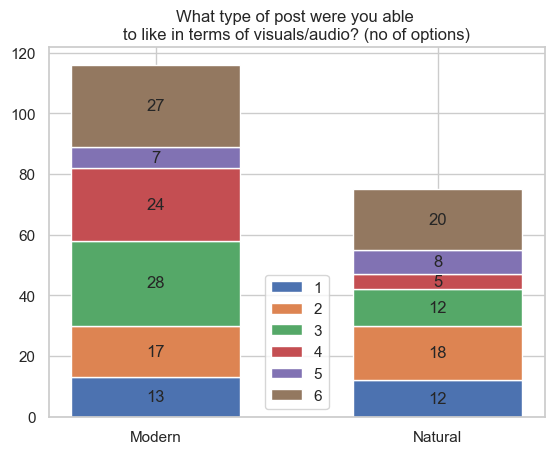

1 Modern- 13
2 Modern- 17
3 Modern- 28
4 Modern- 24
5 Modern- 7
6 Modern- 27
1 Natural- 12
2 Natural- 18
3 Natural- 12
4 Natural- 5
5 Natural- 8
6 Natural- 20


In [67]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,g]),
    '2' : np.array([b,h]),
    '3' : np.array([c,i]),
    '4' : np.array([d,j]),
    '5' : np.array([e,k]),
    '6' : np.array([f,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of visuals/audio? (no of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

In [68]:
contingency_table = pd.crosstab(cdata1['visuals'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between no of visuals types and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between no of visuals types and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
visuals            
1            12  13
2            18  17
3            12  28
4             5  24
5             8   7
6            20  27

Chi-Square Statistic: 11.767240105035697
P-Value: 0.038120136056870806
Degrees of Freedom: 5
Expected Frequencies:
 [[ 9.81675393 15.18324607]
 [13.7434555  21.2565445 ]
 [15.70680628 24.29319372]
 [11.38743455 17.61256545]
 [ 5.89005236  9.10994764]
 [18.45549738 28.54450262]]

H0: There is no significant association between no of visuals types and conversion
Reject the null hypothesis: There is a significant association between no of visuals types and conversion.


##### Visit Social Media 
In the past three months, were you able to visit other social media sites/pages related to Family Planning and Reproductive Health? 

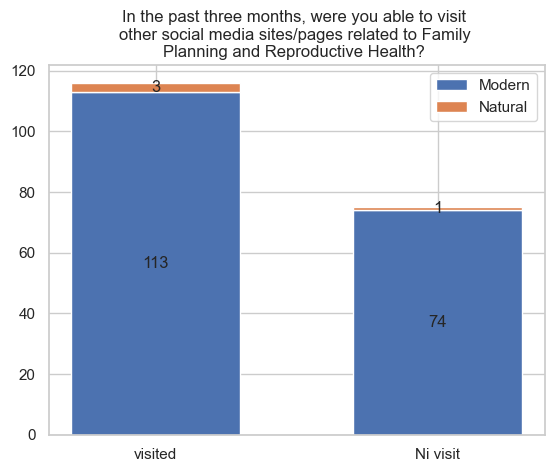

Visited Modern- 113
No Visit Modern- 3
Visited Natural- 74
No Visit Natural- 1


In [69]:
a = ((cdata1['social'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # visited Modern
b = ((cdata1['social'] == 0)  & (cdata1['conversion3'] >= 1) ).sum() # No visit Modern
c = ((cdata1['social'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # visited Natural
d = ((cdata1['social'] == 0)  & (cdata1['conversion3'] < 1) ).sum() # No visit Modern


labels = ['visited','Ni visit']

label1 = {
    'Modern' : np.array([a,c]),
    'Natural' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('In the past three months, were you able to visit \nother social media sites/pages related to Family \nPlanning and Reproductive Health? ')
ax.legend()

plt.show()

print("Visited Modern- " + str (a))
print("No Visit Modern- " + str (b))
print("Visited Natural- " + str (c))
print("No Visit Natural- " + str (d))


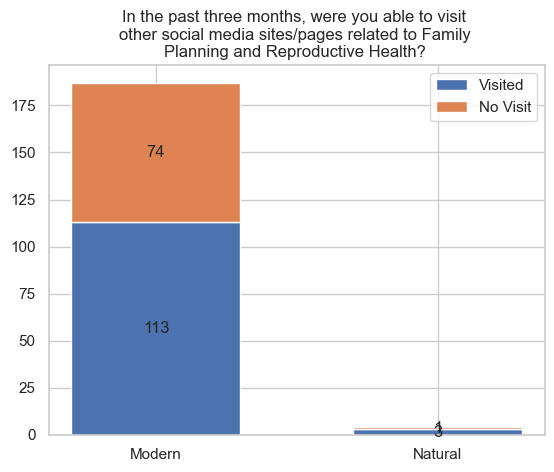

Visited YES- 113
No Visit YES- 3
Visited NO- 74
No Visit NO- 1


In [70]:
labels = ['Modern','Natural']

label1 = {
    'Visited' : np.array([a,b]),
    'No Visit' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('In the past three months, were you able to visit \nother social media sites/pages related to Family \nPlanning and Reproductive Health? ')
ax.legend()

plt.show()

print("Visited YES- " + str (a))
print("No Visit YES- " + str (b))
print("Visited NO- " + str (c))
print("No Visit NO- " + str (d))


In [71]:
contingency_table = pd.crosstab(cdata1['visuals'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between freq of socmed visits and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between freq of socmed visits and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0   1
visuals            
1            12  13
2            18  17
3            12  28
4             5  24
5             8   7
6            20  27

Chi-Square Statistic: 11.767240105035697
P-Value: 0.038120136056870806
Degrees of Freedom: 5
Expected Frequencies:
 [[ 9.81675393 15.18324607]
 [13.7434555  21.2565445 ]
 [15.70680628 24.29319372]
 [11.38743455 17.61256545]
 [ 5.89005236  9.10994764]
 [18.45549738 28.54450262]]

H0: There is no significant association between freq of socmed visits and conversion
Reject the null hypothesis: There is a significant association between freq of socmed visits and conversion1.


#### Logistic Model

In [72]:
print(cdata1.columns.tolist())

['age', 'job', 'educ', 'sex', 'genderid', 'loc', 'device', 'purpose', 'rh_needs', 'benefit', 'platforms', 'oftenvisit', 'learnpage', 'contents', 'visuals', 'civil', 'social', 'conversion3', 'helpful', 'tag', 'age_bracket', 'age_bracket2']


In [73]:
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket2'])
temp['job'] = label_encoder.fit_transform(cdata1['job'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])

temp['sex'] = label_encoder.fit_transform(cdata1['sex'])
temp['genderid'] = label_encoder.fit_transform(cdata1['genderid'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['purpose'] = label_encoder.fit_transform(cdata1['purpose'])

temp['rh_needs'] = label_encoder.fit_transform(cdata1['rh_needs'])
temp['benefit'] = label_encoder.fit_transform(cdata1['benefit'])
temp['platforms'] = label_encoder.fit_transform(cdata1['platforms'])
temp['oftenvisit'] = label_encoder.fit_transform(cdata1['oftenvisit'])

temp['learnpage'] = label_encoder.fit_transform(cdata1['learnpage'])
temp['contents'] = label_encoder.fit_transform(cdata1['contents'])
temp['visuals'] = label_encoder.fit_transform(cdata1['visuals'])
temp['social'] = label_encoder.fit_transform(cdata1['social'])

temp['helpful'] = label_encoder.fit_transform(cdata1['helpful'].astype(int))




X = temp[['age_bracket', 'job', 'educ', 
          'sex','genderid','civil','purpose',
          'rh_needs','benefit','platforms','oftenvisit',
          'learnpage','contents','visuals','social',
          'helpful'
          ]]
y = temp['conversion3']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nFeatures vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.497191
         Iterations 6


Features vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion3   No. Observations:                  191
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                           15
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.2578
Time:                        09:49:48   Log-Likelihood:                -94.963
converged:                       True   LL-Null:                       -127.96
Covariance Type:            nonrobust   LLR p-value:                 2.294e-08
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.2285      0.107     -2.138      0.033      -0.438      -0.0

###### Analysis
significant (p<0.05) for the logistic model <br/>
 (meaning if all paramter is accounted for)
* age bracket2 
* educ 
* no of platforms 
* learnpage (how did you learn the page) 
* no of contents (What type of post were you able to like in terms of contents?)

Additional Analysis

Trim down the platforms

In [80]:
Bayer_data['What platform(s) did you visit?'].head()
Bayer_data['What platform(s) did you visit?'].nunique()

4